<a href="https://colab.research.google.com/github/csabiu/astronomy/blob/main/Astronomy_CMB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download CMB data from WMAP 

In [1]:
!pip install camb
!pip install healpy
!wget https://lambda.gsfc.nasa.gov/data/map/dr5/dcp/spectra/wmap_tt_spectrum_9yr_v5.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.8 MB/s 
  Created wheel for camb: filename=camb-1.3.6-py3-none-any.whl size=1044377 sha256=edd3146e7cea8e3d8998894d6aca4bb606ead1fd206db9729fee2f3cfbb8c74b
  Stored in directory: /root/.cache/pip/wheels/bd/67/8c/7ccb547de7a94170c67cc3294f520e48451d1947bb26572bce
Successfully built camb
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 23.8 MB 1.2 MB/s 
--2022-12-13 00:22:34--  https://lambda.gsfc.nasa.gov/data/map/dr5/dcp/spectra/wmap_tt_spectrum_9yr_v5.txt
Resolving lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)... 129.164.179.68, 2001:4d0:2310:150::68
Connecting to lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)|129.164.179.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88635 (87K) [text/plain]
Saving to: ‘wmap_tt_spectrum_9yr_v

Import things

In [2]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import camb
from camb import model, initialpower

Set up CAMB with a model and parameters

In [36]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()

#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=69.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

#calculate results for these parameters
results = camb.get_results(pars)

#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: 
  print(name)


total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


(2551, 4)


Text(0.5, 0, '$\\ell$')

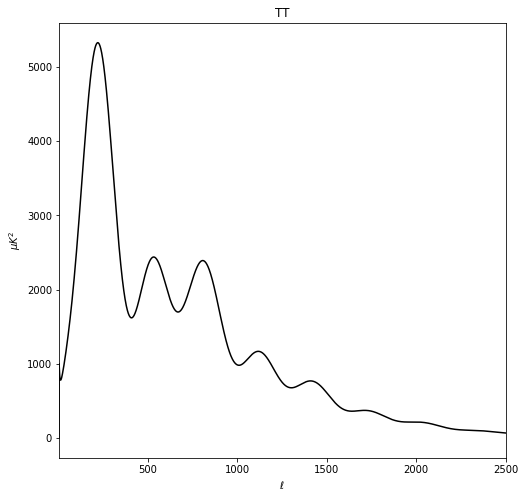

In [37]:
#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
ls = np.arange(totCL.shape[0])
fig, ax = plt.subplots(figsize = (8,8))
ax.plot(ls,totCL[:,0], color='k')
#ax.plot(ls,unlensedCL[:,0], color='r')
ax.set_title('TT')
ax.set_xlim([2,2500])
ax.set_ylabel(r'$\mu K^{2}$')
ax.set_xlabel(r'$\ell$')

# investigate baryon change

Text(0, 0.5, '$C_{\\ell}$')

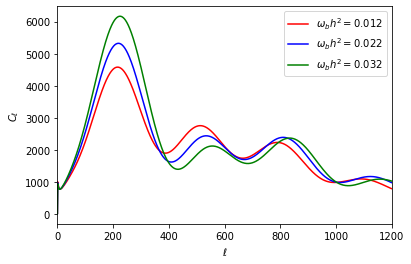

In [38]:
pars.set_cosmology(H0=67.5, ombh2=0.012, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
totCL=powers['total']
plt.plot(ls[:1199],totCL[:1199,0], color='r',label='$\omega_bh^2=0.012$')

pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
totCL=powers['total']
plt.plot(ls[:1199],totCL[:1199,0], color='b',label='$\omega_bh^2=0.022$')

pars.set_cosmology(H0=67.5, ombh2=0.032, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
totCL=powers['total']
plt.plot(ls[:1199],totCL[:1199,0], color='g',label='$\omega_bh^2=0.032$')

plt.legend()
plt.xlim([0,1200])
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}$')


# Exercise: Changing amount of dark matter

#Exercise: Changing curvature

# Exercise: Change Hubble

#Make a Temperature Map for a set of parameters 

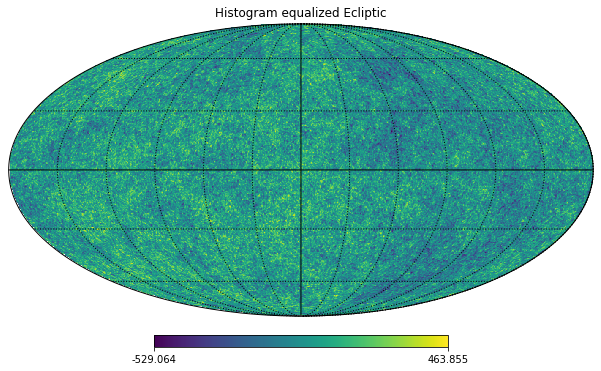

In [8]:
pars.set_cosmology(H0=67.5, ombh2=0.012, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
totCL=powers['total']
plt.plot(ls[:1199],totCL[:1199,0], color='r',label='$\omega_bh^2=0.012$')

map=hp.synfast(totCL[1:,0]*2*np.pi/(ls[1:]**2),512)

hp.mollview(
    map,
    title="Temperature",
)
hp.graticule()

#Exercise: Make a set of 3 temperarture maps changing 1 cosmological parameter

# Load and plot the WMAP data

In [9]:
!wget -c http://lambda.gsfc.nasa.gov/data/map/dr4/skymaps/7yr/raw/wmap_band_iqumap_r9_7yr_W_v4.fits;wget -c http://lambda.gsfc.nasa.gov/data/map/dr4/ancillary/masks/wmap_temperature_analysis_mask_r9_7yr_v4.fits

URL transformed to HTTPS due to an HSTS policy
--2022-12-13 00:24:28--  https://lambda.gsfc.nasa.gov/data/map/dr4/skymaps/7yr/raw/wmap_band_iqumap_r9_7yr_W_v4.fits
Resolving lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)... 129.164.179.68, 2001:4d0:2310:150::68
Connecting to lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)|129.164.179.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100676160 (96M)
Saving to: ‘wmap_band_iqumap_r9_7yr_W_v4.fits’

wmap_band_iqumap_r9 100%[===================>]  96.01M  3.73MB/s    in 26s     

2022-12-13 00:24:55 (3.67 MB/s) - ‘wmap_band_iqumap_r9_7yr_W_v4.fits’ saved [100676160/100676160]

URL transformed to HTTPS due to an HSTS policy
--2022-12-13 00:24:55--  https://lambda.gsfc.nasa.gov/data/map/dr4/ancillary/masks/wmap_temperature_analysis_mask_r9_7yr_v4.fits
Resolving lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)... 129.164.179.68, 2001:4d0:2310:150::68
Connecting to lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)|129.164.179.68|:443..

In [10]:
wmap_map_I = hp.read_map("wmap_band_iqumap_r9_7yr_W_v4.fits")

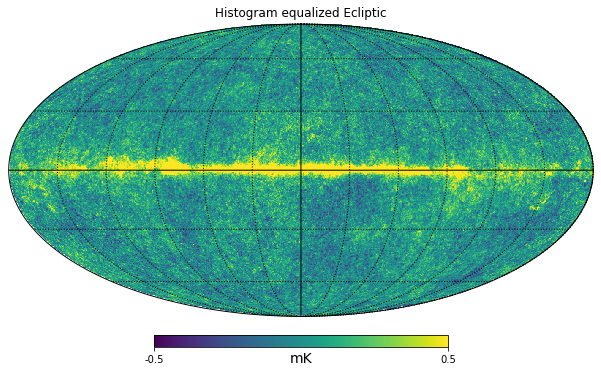

In [46]:
hp.mollview(
    wmap_map_I,
    #coord=["G", "E"],
    title="Histogram equalized Ecliptic",
    unit="mK",
    min=-0.5,
    max=0.5,
)
#hp.mollview(wmap_map_I)
hp.graticule()



# Load the mask (galactic foreground contamination)

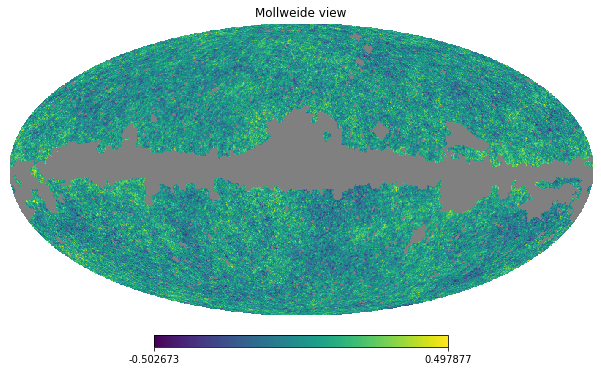

In [39]:
mask = hp.read_map("wmap_temperature_analysis_mask_r9_7yr_v4.fits").astype(np.bool_)
wmap_map_I_masked = hp.ma(wmap_map_I)
wmap_map_I_masked.mask = np.logical_not(mask)

hp.mollview(wmap_map_I_masked.filled())

#Measure the power spcterum form the map

In [32]:
LMAX = 1024
cl = hp.anafast(wmap_map_I_masked.filled(), lmax=LMAX)
ell = np.arange(len(cl))

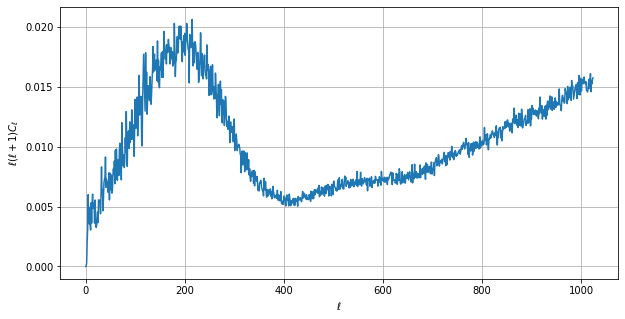

In [47]:
plt.figure(figsize=(10, 5))
plt.plot(ell, ell * (ell + 1) * cl)
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell}$")
plt.grid()

#Exercise: Try to fit a model to the above data by eye (may have to normalise e.g. Cl/large number)

#Load and plot the published CMB data

Text(0, 0.5, '$C_{\\ell}$')

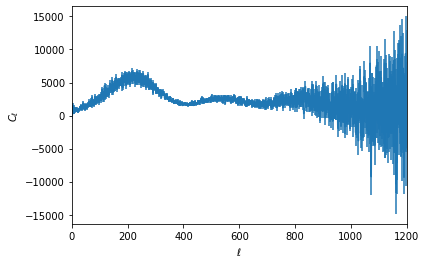

In [7]:
x=np.loadtxt('wmap_tt_spectrum_9yr_v5.txt')
ell=x[:,0]
cl=x[:,1]
err=x[:,2]
np.shape(err)

plt.errorbar(ell,cl,err,marker=None, linestyle=None)
plt.xlim([0,1200])
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}$')